<a href="https://colab.research.google.com/github/np03cs4a240275-eng/Concepts-and-Technologies-of-AI/blob/main/workshop0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# 7.1 Warming Up Exercise (ONLY what is asked)


# Daily time (in hours): [study, entertainment, sleep]
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]



# Task 1: Classify Study Time


low_study = []        # < 3 hours
moderate_study = []   # 3 to 5 hours
high_study = []       # > 5 hours

for study, entertainment, sleep in time_data:
    if study  < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)

print("Low study hours:", low_study)
print("Moderate study hours:", moderate_study)
print("High study hours:", high_study)
print()

Low study hours: [2.5, 1.5, 2.0, 2.5]
Moderate study hours: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study hours: [5.5, 6.0]



In [ ]:

# Task 2: Count number of days


print("Days with LOW study time:", len(low_study))
print("Days with MODERATE study time:", len(moderate_study))
print("Days with HIGH study time:", len(high_study))
print()


Days with LOW study time: 4
Days with MODERATE study time: 9
Days with HIGH study time: 2



In [ ]:

# Task 3: Convert Study Hours to Minutes


study_minutes = []

for study, entertainment, sleep in time_data:
    study_minutes.append(study * 60)

print("Study hours converted to minutes:")
print(study_minutes)
print()

Study hours converted to minutes:
[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]



In [ ]:

# Task 4: Average Study / Entertainment / Sleep

study_hours = []
entertainment_hours = []
sleep_hours = []

for study, entertainment, sleep in time_data:
    study_hours.append(study)
    entertainment_hours.append(entertainment)
    sleep_hours.append(sleep)

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print(f"Average study hours:        {avg_study:.2f}")
print(f"Average entertainment hours:{avg_entertainment:.2f}")
print(f"Average sleep hours:        {avg_sleep:.2f}")
print()

Average study hours:        3.70
Average entertainment hours:2.50
Average sleep hours:        7.17



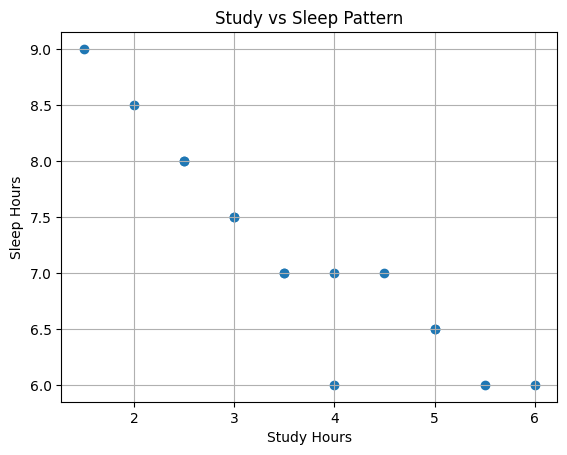

In [ ]:
# Task 5: Scatter Plot (Study vs Sleep)

import matplotlib.pyplot as plt

plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.grid(True)
plt.show()

In [ ]:
# 8.1.1 Task 1 - Sum of Nested Lists

def sum_nested_list(nested_list):

    total = 0
    for element in nested_list:
        if isinstance(element, list):
            total += sum_nested_list(element)  # recursive step
        else:
            total += element
    return total

# Test
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Task 1 - Sum of nested list:", sum_nested_list(nested_list))


Task 1 - Sum of nested list: 36


In [ ]:

# 8.1.1 Task 2 - Generate All Permutations of a String

def generate_permutations(s):

    # Base case: empty or single-char string
    if len(s) <= 1:
        return [s]

    permutations_set = set()  # to avoid duplicates

    for i, ch in enumerate(s):
        # Remaining string after choosing character at index i
        remaining = s[:i] + s[i+1:]
        # Generate permutations of the remaining part
        for perm in generate_permutations(remaining):
            permutations_set.add(ch + perm)

    # Convert set to list for final result
    return list(permutations_set)

# Tests
print("Task 2 - Permutations of 'abc':")
print(sorted(generate_permutations("abc")))

print("\nTask 2 - Permutations of 'aab':")
print(sorted(generate_permutations("aab")))

Task 2 - Permutations of 'abc':
['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

Task 2 - Permutations of 'aab':
['aab', 'aba', 'baa']


In [ ]:

# 8.1.1 Task 3 - Directory Size Calculation

directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

def calculate_directory_size(directory):

    total_size = 0
    for name, value in directory.items():
        if isinstance(value, dict):
            # value is a subdirectory
            total_size += calculate_directory_size(value)
        else:
            # value is a file size
            total_size += value
    return total_size

# Test
print("Task 3 - Total directory size (KB):", calculate_directory_size(directory_structure))


Task 3 - Total directory size (KB): 1400


In [ ]:

# 8.2.1 Task 1 - Coin Change Problem


def min_coins(coins, amount):

    # dp[i] = minimum coins needed to form amount i
    dp = [float("inf")] * (amount + 1)
    dp[0] = 0  # 0 coins needed to make amount 0

    for coin in coins:
        for target in range(coin, amount + 1):
            dp[target] = min(dp[target], dp[target - coin] + 1)

    return dp[amount] if dp[amount] != float("inf") else -1

# Test
coins = [1, 2, 5]
amount = 11
print("Task 1 - Minimum coins needed for amount 11 with [1,2,5]:", min_coins(coins, amount))


Task 1 - Minimum coins needed for amount 11 with [1,2,5]: 3


In [ ]:

# 8.2.1 Task 2 - Longest Common Subsequence (LCS)


def longest_common_subsequence(s1, s2):

    m = len(s1)
    n = len(s2)

    # dp[i][j] = LCS length of s1[:i] and s2[:j]
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Build table bottom-up
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                # characters match – extend LCS
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                # take the best of dropping one char from either string
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]

# Test
s1 = "abcde"
s2 = "ace"
print(f"Task 2 - LCS length of '{s1}' and '{s2}':", longest_common_subsequence(s1, s2))


Task 2 - LCS length of 'abcde' and 'ace': 3


In [ ]:

# 8.2.1 Task 3 - 0/1 Knapsack Problem


def knapsack(weights, values, capacity):

    n = len(weights)

    # dp[i][w] = max value using first i items with capacity w
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Build table
    for i in range(1, n + 1):
        wt = weights[i - 1]
        val = values[i - 1]
        for w in range(1, capacity + 1):
            if wt > w:
                # can't take item i-1
                dp[i][w] = dp[i - 1][w]
            else:
                # max of not taking or taking this item
                dp[i][w] = max(
                    dp[i - 1][w],                # not take
                    dp[i - 1][w - wt] + val      # take
                )

    return dp[n][capacity]

# Test
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7
print("Task 3 - Max value for capacity :", knapsack(weights, values, capacity))


Task 3 - Max value for capacity : 9
